https://www.kaggle.com/datasets/ashydv/advertising-dataset

In [2]:
# scikit-learn 설치 및 버전 확인
# pip install scikit-learn

import sklearn
sklearn.__version__

'1.8.0'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

### 데이터 톺아보기

In [7]:
import pandas as pd

# TODO: advertising.csv 파일을 읽어와서 5개의 레코드를 출력
advertising = pd.read_csv("data/advertising.csv")
# TODO 2
advertising.head(5)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
# TODO: 데이터프레임 정보 확인하기

advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
# TODO: 통계정보 확인하기
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
# TODO: 통계 정보 행과 열 바꾸기
advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [13]:
# TODO: 컬럼간의 상관계수 확인하기
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


위의 상관계수를 히트맵으로 그리기

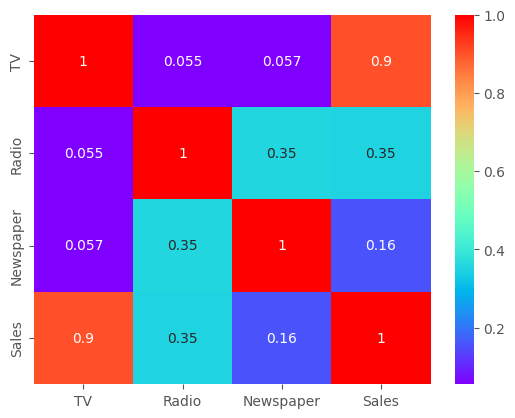

In [18]:
#선형회귀의 feature을 찾기 위해 히트맵을 그린다.

import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = advertising.corr()
sns.heatmap(corrMatrix, annot=True, cmap='rainbow')
plt.show()

In [22]:
# 히트맵을 기준으로 상관 관계가 높은 속성을 내림 차순으로 정렬하여 시각화

corr_sort = corrMatrix[['Sales']].sort_values(by='Sales', ascending=False)
#TODO:YOUR_CODE_HERE
corr_sort

,Sales
Sales,1.000000
TV,0.901208
Radio,0.349631
Newspaper,0.157960


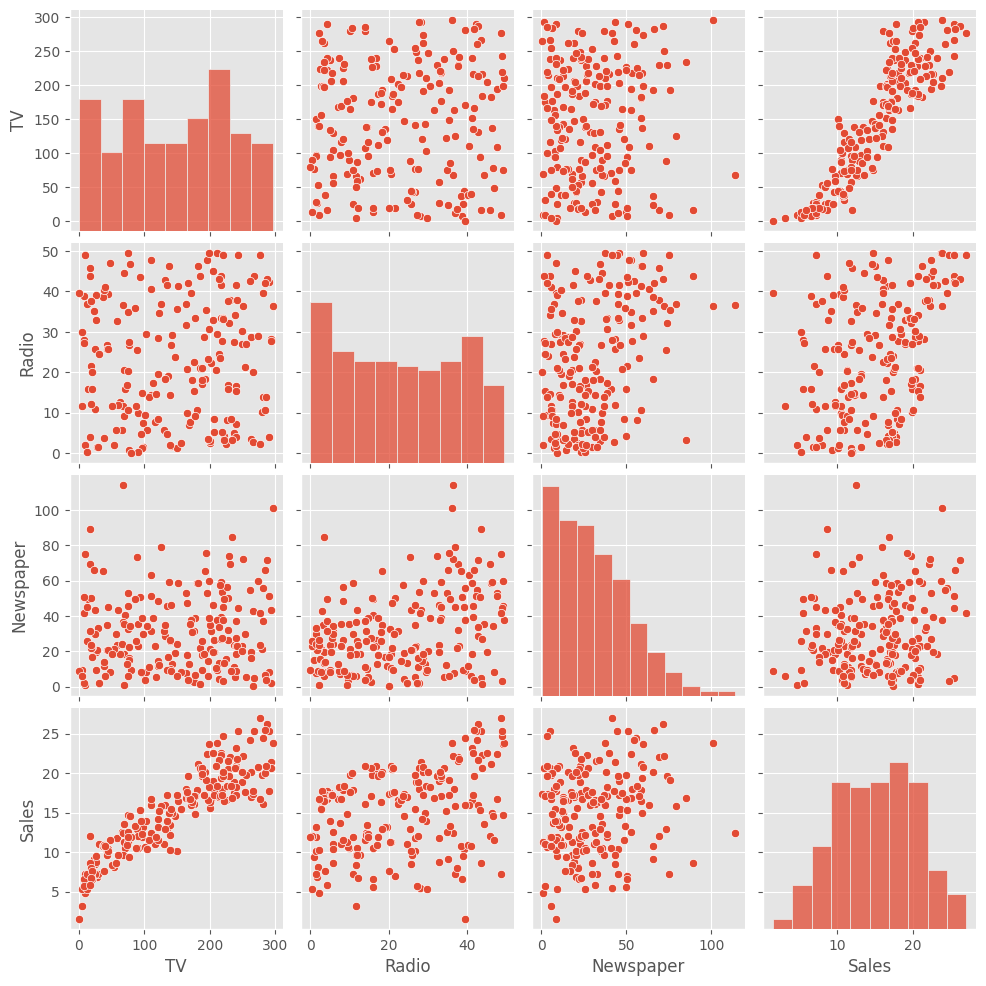

In [23]:
sns.pairplot(advertising)
plt.show()

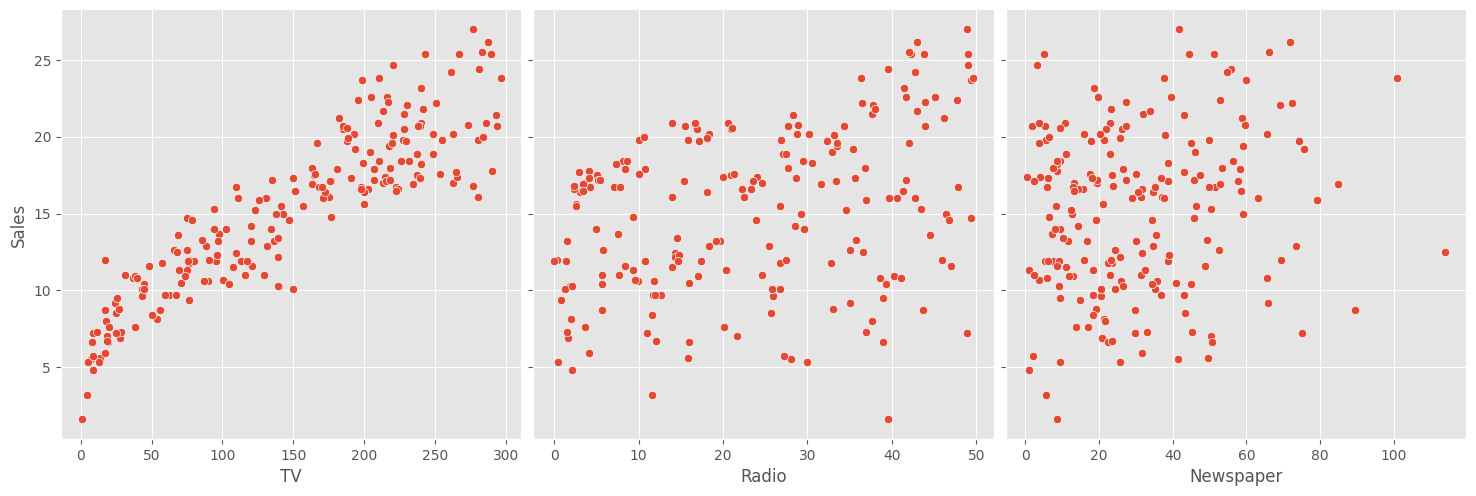

In [26]:

sns.pairplot(data=advertising, height=5, x_vars=['TV','Radio','Newspaper'], y_vars='Sales') #TODO:YOUR_CODE_HERE
plt.show()

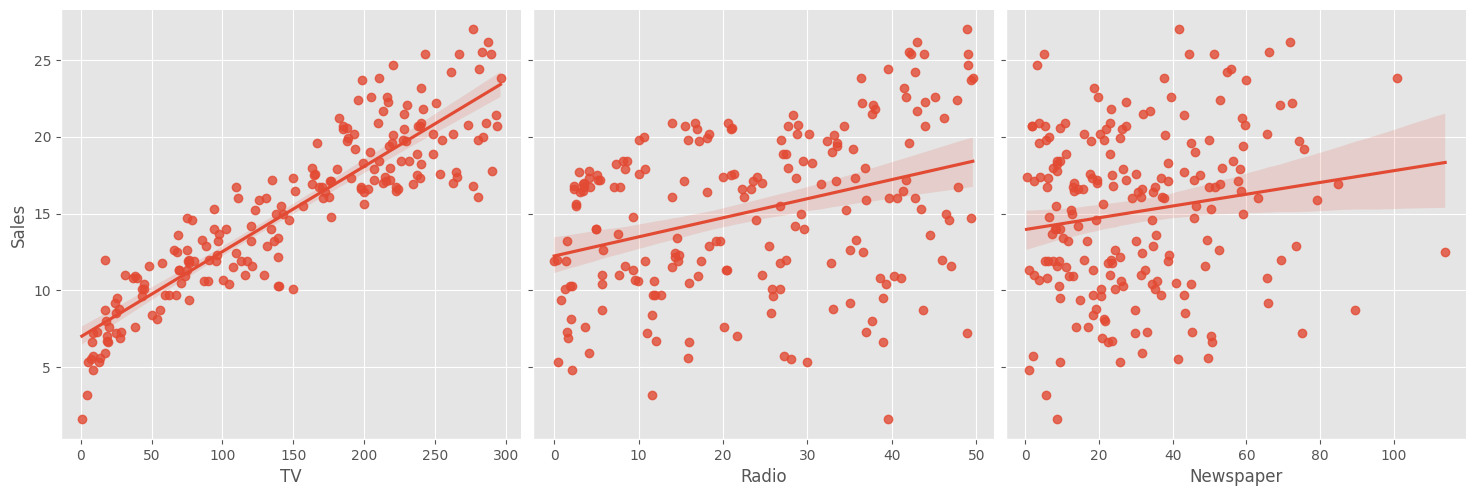

In [33]:
# 'TV', 'Radio', 'Newspaper'의 판매량 pairplot의 세개의 그래프만 그리면서 산점도와 함께 선형회귀선 포함하여 시각화하기

sns.pairplot(data=advertising, height=5, 
             x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='reg')
plt.show()

상관관계를 볼 때에 
-히트맵
-pairplot
등 차트로 확인한 후 회귀 분석에 활용하게 된다.

### 단순 선형 회귀

In [ ]:
# 단순 선형 회귀로 모델 학습하고 평가하기

In [ ]:
#독립변수로 TV 컬럼만 데이터프레임 형태로 가져온다. ['TV']는 시리즈라서 1차원이니까 [['TV']]로, 데이터프레임-2차원으로 가져온다
X_data1 = advertising[['TV']]

#종속변수(타겟)로 Sales 데이터를 가져온다. 시리즈로. y는 수학적으로 벡터이고, sklearn이 그걸 벡터로 기대하기 때문
y_data1 = advertising['Sales']

In [56]:
# 훈련 데이터와 테스트 데이터를 7:3 비율로 나누기, random_state = 42
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1, y_data1, test_size=0.3, random_state = 10)
# TODO:YOUR_CODE_HERE
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(140, 1) (60, 1) (140,) (60,)


In [57]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성 TODO:YOUR_CODE_HERE
lr_model1 = LinearRegression()
# 선형 회귀 모델 학습 TODO:YOUR_CODE_HERE
lr_model1.fit(X_train1,y_train1)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


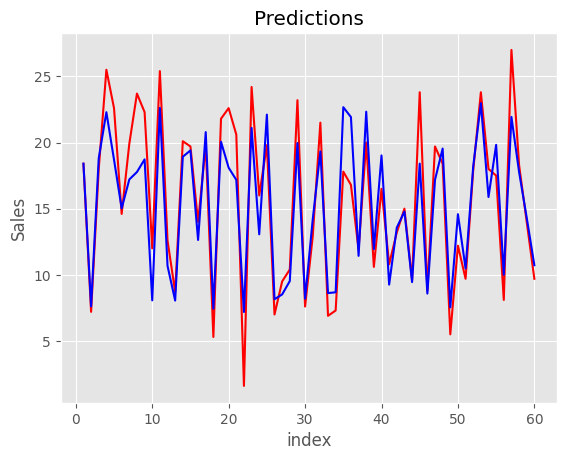

In [58]:
y_pred1 = lr_model1.predict(X_test1)

c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test1, color = 'r') # 실젯값
plt.plot(c, y_pred1, color = 'b') # 예측값
plt.xlabel('index') # X축 이름
plt.ylabel('Sales') # Y축 이름
plt.title('Predictions') # 그래프 제목
plt.show()

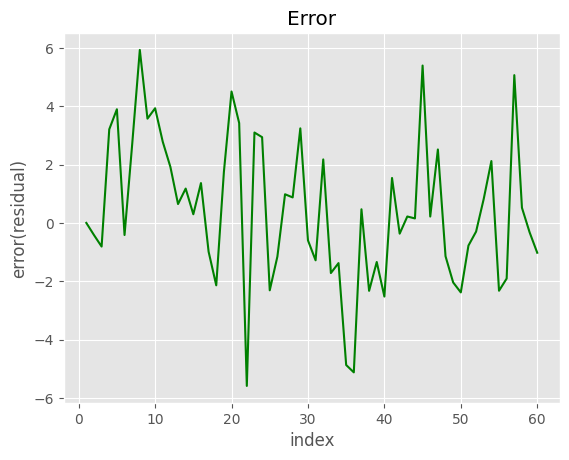

In [59]:
error = y_test1 - y_pred1 # 실젯값 - 예측값 TODO:YOUR_CODE_HERE

plt.plot(c, error, color = 'g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [ ]:
# 평가 지표 구하기

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'MSE: {mean_squared_error(y_test1, y_pred1):.2f}') # 평균 제곱 오차(MSE)
print(f'r2_score: {r2_score(y_test1, y_pred1):.2f}') # 결정계수(R2)

MSE: 5.18
r2_score: 0.81


In [ ]:
plt.scatter(X_scaled1, y_data1, color = 'red', label = 'scatter plot')
plt.plot(X_test1, y_pred1, color = 'blue', linewidth = 2, label = 'Regression Line')
plt.show()

In [60]:
# Slope Coefficients(기울기 계수)
w1 = lr_model1.coef_ # 기울기
print(f'slopes of TV: {w1[0]:.2f}')

# Intercept(절편)
b1 = lr_model1.intercept_ # y 절편
print('Intercept is:', b1.round(2))

slopes of TV: 0.05
Intercept is: 7.15


y = 0.05 X + 7.15

In [75]:
# 새로운 TV광고비를 입력받아 값 예측하기
# tv 광고비 : 10만 달러 -> sales point?

In [74]:
tv = 100
print(w1 * tv + b1)

[12.48950109]


In [77]:
y_pred00 = lr_model1.predict([[100]])
y_pred00

array([12.48950109])

In [78]:
tv_df = pd.DataFrame([[100]], columns=['TV'])
print(lr_model1.predict(tv_df))

[12.48950109]


### 다중 선형 회귀

In [82]:
# 타겟과 속성 분리하기
#X_data2 = advertising[['TV','Radio','Newspaper']] # TODO:YOUR_CODE_HERE
X_data2 = advertising.drop(['Sales'],axis=1)
y_data2 = advertising['Sales'] # TODO:YOUR_CODE_HERE

<Axes: >

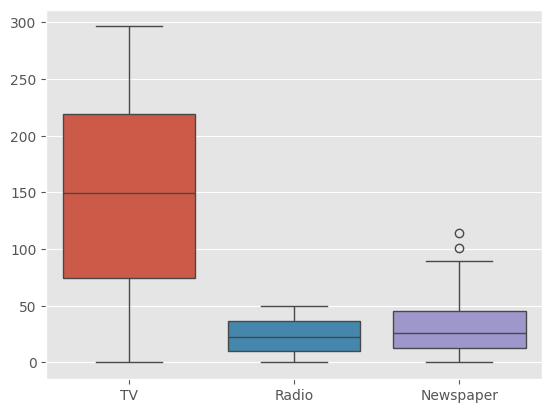

In [81]:
sns.boxplot(X_data2)

#X값의 범위를 확인해보고 컬럼 간의 범위를 맞춰준다 = scaling. 일반적으로 스탠다드 스케일러를 써서 아웃라이어를 정리한다.

In [ ]:
# 훈련 데이터와 테스트 데이터를 7:3으로 나누기
# random_state 옵션을 사용하여 훈련 데이터와 테스트 데이터를 동일한 패턴으로 추출하기

In [136]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=0.3, random_state = 10)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(140, 3) (60, 3) (140,) (60,)


In [ ]:
# 모델 생성하고 학습시키기

In [193]:
from sklearn.linear_model import LinearRegression

lr_model3 = LinearRegression() 
lr_model3.fit(X_train2,y_train2)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


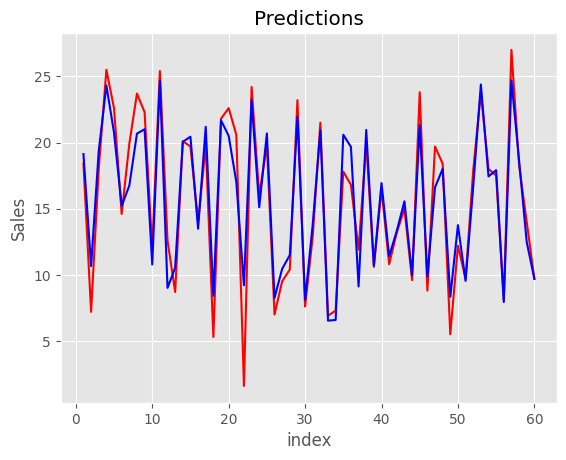

In [194]:
y_pred3 = lr_model3.predict(X_test2)

c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test2, color = 'r') # 실젯값
plt.plot(c, y_pred3, color = 'b') # 예측값
plt.xlabel('index') # X축 이름
plt.ylabel('Sales') # Y축 이름
plt.title('Predictions') # 그래프 제목
plt.show()

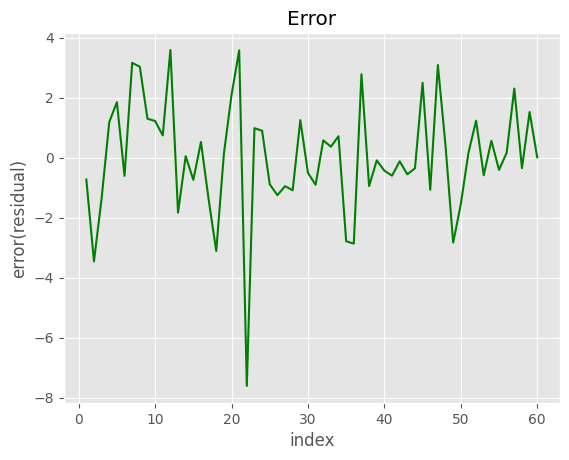

In [195]:
error = y_test2 - y_pred3 # 실젯값 - 예측값 TODO:YOUR_CODE_HERE

plt.plot(c, error, color = 'g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [196]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'MSE: {mean_squared_error(y_test2, y_pred3):.2f}') # 평균 제곱 오차(MSE)
print(f'r2_score: {r2_score(y_test2, y_pred3):.2f}') # 결정계수(R2)

MSE: 3.66
r2_score: 0.90


In [197]:
# 속성값의 차이가 있으므로 범위를 일정하게 맞춰 주는 표준화 적용하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # TODO:YOUR_CODE_HERE

X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

<Axes: >

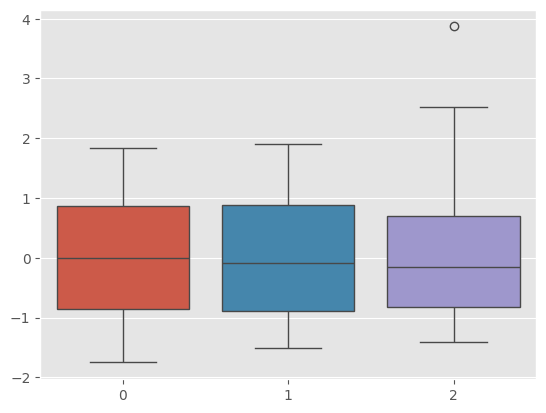

In [198]:
sns.boxplot(X_train_scaled)

In [199]:
# 모델 생성하고 학습시키기
from sklearn.linear_model import LinearRegression

lr_model2 = LinearRegression() # TODO:YOUR_CODE_HERE
lr_model2.fit(X_train_scaled, y_train2) # TODO:YOUR_CODE_HERE

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
# 실제값과 예측값을 구해 데이터프레임 형태로 만들기

In [200]:
y_pred2 = lr_model2.predict(X_test_scaled)

In [201]:
mlr = pd.DataFrame({'Actual_value': y_test2, 'Model prediction':lr_model2.predict(X_test_scaled)})
mlr.head()

,Actual_value,Model prediction
59,18.4,19.127479
5,7.2,10.658525
20,18.0,19.356496
198,25.5,24.315643
52,22.6,20.751037


In [ ]:
# 실제값과 예측값의 오차를 그래프로 표현

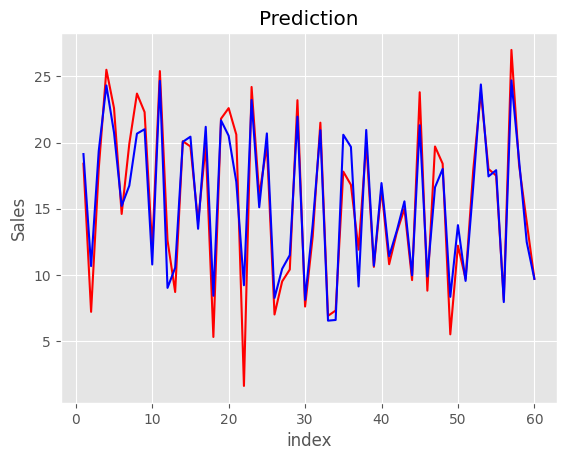

In [145]:
y_pred2 = lr_model2.predict(X_test_scaled)
c = [i for i in range(1, 61, 1)]

plt.plot(c, y_test2, color = 'r')
plt.plot(c, y_pred2, color ='b')
plt.xlabel('index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

In [111]:
# 오차 그래프로 시각화하기

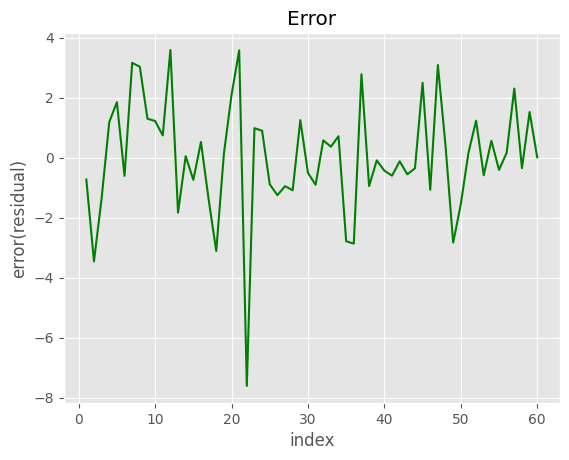

In [146]:
error2 = y_test2 - y_pred2 # TODO:YOUR_CODE_HERE
plt.plot(c, error2, color ='g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [202]:
print(f'MSE:{mean_squared_error(y_test2, y_pred2):.2f}')
print(f'r2_score:{r2_score(y_test2, y_pred2):.2f}')

MSE:3.66
r2_score:0.90


In [150]:
# 기울기 계수
w2 = lr_model2.coef_ # TODO:YOUR_CODE_HERE
print(f'slopes of TV:{w2[0]:.2f}')
print(f'slopes of Radio:{w2[1]:.2f}')
print(f'slopes of Newspaper:{w2[2]:.2f}')

# 절편
b2 = lr_model2.intercept_
#TODO:YOUR_CODE_HERE
print('Intercept is:', b2.round(2))

slopes of TV:4.23
slopes of Radio:1.55
slopes of Newspaper:0.01
Intercept is: 14.92


In [151]:
# 새로운 값 예측하기 [[180,18,3]]
data = [[180,18,3]]
new_data_df = pd.DataFrame([[180,18,3]], columns=['TV','Radio','Newspaper'])
#스케일링
scaled_data = scaler.transform(new_data_df)
lr_model2.predict(scaled_data)

array([16.2797735])

### 다항회귀

In [ ]:
# 다항회귀

In [162]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [164]:
from sklearn.model_selection import train_test_split

X_data = advertising.drop(['Sales'],axis=1)
y_data = advertising['Sales'] # TODO:YOUR_CODE_HERE
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 3) (60, 3) (140,) (60,)


In [170]:
poly = PolynomialFeatures(degree=2, include_bias=False) #include_bias=False: 상수항은 내가 처리 할게!
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly.shape

(140, 9)

<Axes: >

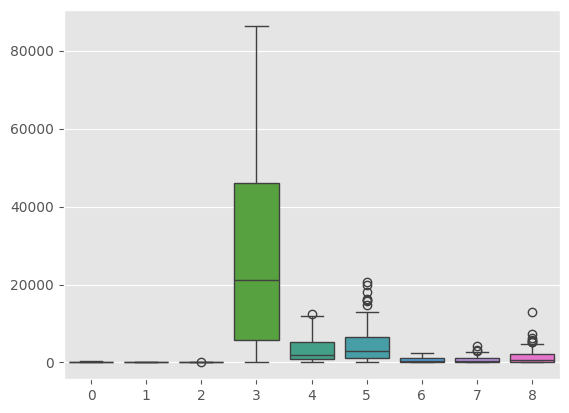

In [169]:
sns.boxplot(X_train_poly)

#3번이 너무 어마어마한 숫자를 낸다 (제곱되었기 떄문) 값이 증폭되어 어쩔수 없다. 이를 수정하기 위해 스케일링 해주어야 한다.

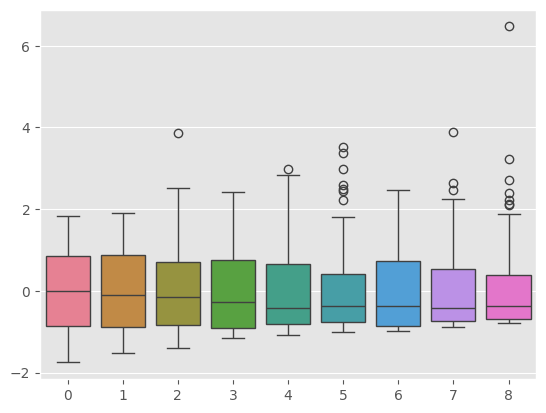

In [173]:
# 속성값의 차이가 있으므로 범위를 일정하게 맞춰 주는 표준화 적용하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # TODO:YOUR_CODE_HERE

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

sns.boxplot(X_train_poly_scaled);

In [181]:
# 모델 생성하고 학습 시키기

from sklearn.linear_model import LinearRegression

lr_model_poly = LinearRegression()
lr_model_poly.fit(X_train_poly_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [186]:
# 실제값과 예측값을 구해 데이터프레임 형태로 만들기

mlr_poly = pd.DataFrame({'Actual_value': y_test, 'Model prediction':lr_model_poly.predict(X_test_poly_scaled)})
mlr_poly.head()

,Actual_value,Model prediction
59,18.4,19.266760
5,7.2,8.716315
20,18.0,19.331718
198,25.5,24.208922
52,22.6,21.375838


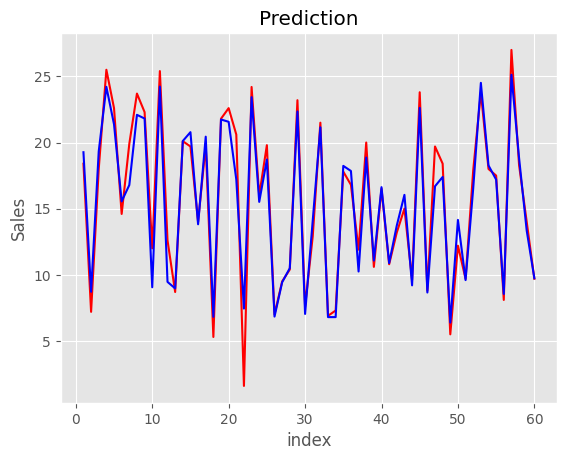

In [187]:
# 실제값과 예측값의 오차를 그래프로 표현

y_pred_poly = lr_model_poly.predict(X_test_poly_scaled)
c = [i for i in range (1,61,1)]

plt.plot(c,y_test,color = 'r')
plt.plot(c,y_pred_poly,color = 'b')
plt.xlabel('index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()


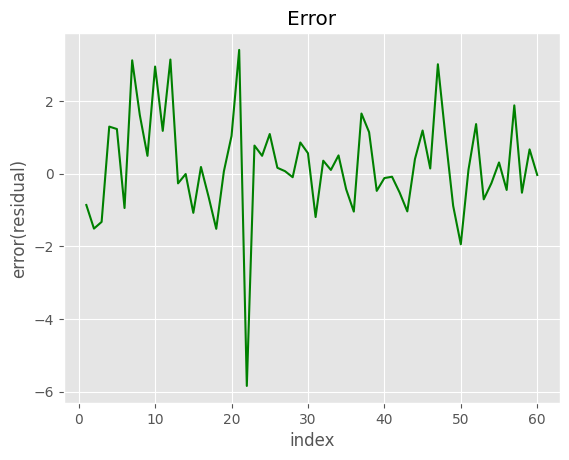

In [179]:
error = y_test - y_pred_poly # TODO:YOUR_CODE_HERE
plt.plot(c, error, color ='g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [180]:
print(f'MSE:{mean_squared_error(y_test, y_pred_poly):.2f}')
print(f'r2_score:{r2_score(y_test, y_pred_poly):.2f}')

MSE:2.12
r2_score:0.94


### 규제

In [188]:
# 규제 overfitting(과적합)을 줄여주는 효과

from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train_poly_scaled,y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",10
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [190]:
pred_ridge = model_ridge.predict(X_test_poly_scaled)

print(f'MSE:{mean_squared_error(y_test, pred_ridge):.2f}')
print(f'r2_score:{r2_score(y_test, pred_ridge):.2f}')

MSE:3.20
r2_score:0.92


In [ ]:
# 단순회귀 (TV만)
MSE: 5.18
r2_score: 0.81

# 다중선형회귀 (TV,radio,newspaper)
MSE: 3.66
r2_score: 0.90

#다중선형회귀 + 스케일링
MSE:3.66
r2_score:0.90

#다항회귀 + 스케일링
MSE:2.12
r2_score:0.94

#다항회귀 + 스케일링 + 규제(ridge)
MSE:3.20
r2_score:0.92